## 3.5 Pyramids and wavelets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### 3.5.1 Interpolation


We first try a naive interpolation type with rate $2$


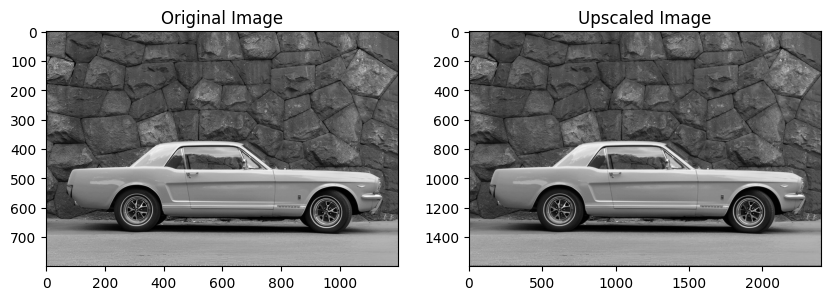

In [ ]:
# We choose a simple image : binary_image.png
image = cv2.imread('dat/car_sideview.jpg', cv2.IMREAD_GRAYSCALE)
output = np.zeros((image.shape[0] * 2, image.shape[1] * 2))
# put the original image as 2*i th row and 2*j th column
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        output[2 * i, 2 * j] = image[i, j]
# # now first we interpolate 2i+1, 2j+1 from the corner pixels (2i, 2j), (2i, 2j+2), (2i+2, 2j), (2i+2, 2j+2)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if i < image.shape[0] - 1 and j < image.shape[1] - 1:
            output[2 * i + 1, 2 * j + 1] = (output[2 * i, 2 * j] + output[2 * i, 2 * j + 2] +
                                              output[2 * i + 2, 2 * j] + output[2 * i + 2, 2 * j + 2]) // 4

# now we interpolate 2i+1, 2j and 2i, 2j+1 from the top, left, bottom, right pixels for each pixel
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if i < image.shape[0] - 1 and j < image.shape[1] - 1:
            output[2 * i + 1, 2 * j] = (output[2 * i, 2 * j] + output[2 * i, 2 * j + 2] +
                                             output[2 * i + 2, 2 * j] + output[2 * i + 2, 2 * j + 2]) // 4
            output[2 * i, 2 * j + 1] = (output[2 * i, 2 * j] + output[2 * i + 2, 2 * j] +
                                             output[2 * i, 2 * j + 2] + output[2 * i + 2, 2 * j + 2]) // 4

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(output, cmap='gray')
plt.title('Upscaled Image')
plt.show()


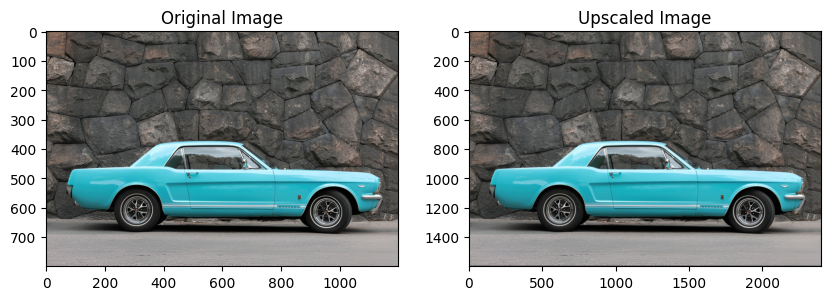

True

In [ ]:
# Read RGB image
image = cv2.imread('dat/car_sideview.jpg')  # shape: (H, W, 3)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Initialize output array (2x height, 2x width, 3 channels)
output = np.zeros((image.shape[0] * 2, image.shape[1] * 2, 3), dtype=np.uint8)

# 1. Copy original pixels to (2i, 2j) positions
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        output[2 * i, 2 * j] = image[i, j]

# 2. Interpolate (2i+1, 2j+1) from four corner neighbors
for i in range(image.shape[0] - 1):
    for j in range(image.shape[1] - 1):
        output[2 * i + 1, 2 * j + 1] = (
            output[2 * i, 2 * j].astype(np.uint16) +
            output[2 * i, 2 * j + 2].astype(np.uint16) +
            output[2 * i + 2, 2 * j].astype(np.uint16) +
            output[2 * i + 2, 2 * j + 2].astype(np.uint16)
        ) // 4



# 3. Interpolate (2i+1, 2j) and (2i, 2j+1) from N4 neighbors
for i in range(image.shape[0] - 1):
    for j in range(image.shape[1] - 1):
        output[2 * i + 1, 2 * j] = (
            output[2 * i, 2 * j].astype(np.uint16) +
            output[2 * i, 2 * j + 2].astype(np.uint16) +
            output[2 * i + 2, 2 * j].astype(np.uint16) +
            output[2 * i + 2, 2 * j + 2].astype(np.uint16)
        ) // 4
        output[2 * i, 2 * j + 1] = (
            output[2 * i, 2 * j].astype(np.uint16) +
            output[2 * i + 2, 2 * j].astype(np.uint16) +
            output[2 * i, 2 * j + 2].astype(np.uint16) +
            output[2 * i + 2, 2 * j + 2].astype(np.uint16)
        ) // 4

# Optional: convert back to uint8 if needed
output = output.astype(np.uint8)

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(output)
plt.title('Upscaled Image')
plt.show()
# Save the output image if needed
cv2.imwrite('results/result_upscaled.jpg', cv2.cvtColor(output, cv2.COLOR_RGB2BGR))


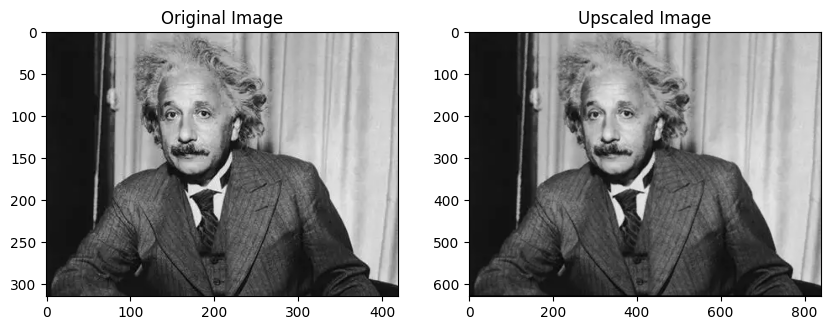

True

In [ ]:
# Read RGB image
image = cv2.imread('dat/einstein.png')  # shape: (H, W, 3)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Initialize output array (2x height, 2x width, 3 channels)
output = np.zeros((image.shape[0] * 2, image.shape[1] * 2, 3), dtype=np.uint8)

# 1. Copy original pixels to (2i, 2j) positions
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        output[2 * i, 2 * j] = image[i, j]

# 2. Interpolate (2i+1, 2j+1) from four corner neighbors
for i in range(image.shape[0] - 1):
    for j in range(image.shape[1] - 1):
        # output[2 * i + 1, 2 * j + 1] = (
        #     output[2 * i, 2 * j].astype(np.uint16) +
        #     output[2 * i, 2 * j + 2].astype(np.uint16) +
        #     output[2 * i + 2, 2 * j].astype(np.uint16) +
        #     output[2 * i + 2, 2 * j + 2].astype(np.uint16)
        # ) // 4

        # we now improve upon the previous method. 
        # for 2x2 block of pixels (these will convert to corner pixels in the output):
        # we can have 4 types of boundaries, horizontal, vertical, and two diagonal boundaries.
        # for horizontal and vertical boundaries, pair of pixels on each side will have similarity in color.
        # for diagonal boundaries, any 3 pixels will have similarity and other will be different.

        # we first decide the type of boundary
        # 4 pixels => 6 possible comparisons
        p00 = output[2 * i, 2 * j].astype(np.uint16)
        p01 = output[2 * i, 2 * j + 2].astype(np.uint16)
        p10 = output[2 * i + 2, 2 * j].astype(np.uint16)
        p11 = output[2 * i + 2, 2 * j + 2].astype(np.uint16)

        # now to determine the type of boundary, we calculate all 6 possible distances (euclidean), then take 2 smallest distances
        d_01 = np.linalg.norm(p00 - p01)
        d_02 = np.linalg.norm(p00 - p10)
        d_03 = np.linalg.norm(p00 - p11)
        d_12 = np.linalg.norm(p01 - p10)
        d_13 = np.linalg.norm(p01 - p11)
        d_23 = np.linalg.norm(p10 - p11)
        distances = [(d_01, (0, 1)), (d_02, (0, 2)), (d_03, (0, 3)),
                     (d_12, (1, 2)), (d_13, (1, 3)), (d_23, (2, 3))]
        distances.sort(key=lambda x: x[0])
        d_1st = distances[0][1]
        d_2nd = distances[1][1]
        indices = [d_1st[0], d_1st[1], d_2nd[0], d_2nd[1]]
        indices = set(indices) # unique indices
        # now if all 0,1,2,3 are in indices, then it is horizontal or vertical boundary
        if len(indices) == 4:
            # horizontal boundary, checking one pair e.g. 0,1 present in either d_1st or d_2nd
            if (d_1st == (0, 1) or d_2nd == (0, 1)):
                # any influence can be taken, we take top influences.
                output[2 * i + 1, 2 * j + 1] = (p00 + p01) // 2
            else:
                # vertical boundary, we take left influences.
                output[2 * i + 1, 2 * j + 1] = (p00 + p10) // 2
        else: # it is diagonal boundary
            sum_ = p00 + p01 + p10 + p11
            if 0 not in indices:
                output[2 * i + 1, 2 * j + 1] = (sum_ - p00) // 3
            elif 1 not in indices:
                output[2 * i + 1, 2 * j + 1] = (sum_ - p01) // 3
            elif 2 not in indices:
                output[2 * i + 1, 2 * j + 1] = (sum_ - p10) // 3
            else:
                output[2 * i + 1, 2 * j + 1] = (sum_ - p11) // 3

# 3. Interpolate (2i+1, 2j) and (2i, 2j+1) from N4 neighbors
for i in range(image.shape[0] - 1):
    for j in range(image.shape[1] - 1):
        # output[2 * i + 1, 2 * j] = (
        #     output[2 * i, 2 * j].astype(np.uint16) + # top
        #     output[2 * i + 2, 2 * j].astype(np.uint16) + # bottom
        #     output[2 * i + 1, 2 * j-1].astype(np.uint16) + # left
        #     output[2 * i + 1, 2 * j + 1].astype(np.uint16) # right
        # ) // 4
        # output[2 * i, 2 * j + 1] = (
        #     output[2 * i -1, 2 * j +1].astype(np.uint16) + # top
        #     output[2 * i, 2 * j].astype(np.uint16) + # left
        #     output[2 * i, 2 * j + 2].astype(np.uint16) + # right
        #     output[2 * i + 1, 2 * j + 1].astype(np.uint16) # bottom
        # ) // 4

        # we now improve upon the previous method.
        # in point 2. we have improved the edge interpolation. Now in this point, we would have 
        # any 3 pixels similar and one different.

        # part a: for output[2 * i + 1, 2 * j]
        # top -> p00, left -> p01, right -> p10, bottom -> p11
        p00 = output[2 * i, 2 * j].astype(np.uint16)
        p01 = output[2 * i + 1, 2 * j - 1].astype(np.uint16)
        p10 = output[2 * i + 1, 2 * j + 1].astype(np.uint16)
        p11 = output[2 * i + 2, 2 * j].astype(np.uint16)

        distances = []
        d_01 = np.linalg.norm(p00 - p01)
        d_02 = np.linalg.norm(p00 - p10)
        d_03 = np.linalg.norm(p00 - p11)
        d_12 = np.linalg.norm(p01 - p10)
        d_13 = np.linalg.norm(p01 - p11)
        d_23 = np.linalg.norm(p10 - p11)
        distances = [(d_01, (0, 1)), (d_02, (0, 2)), (d_03, (0, 3)),
                     (d_12, (1, 2)), (d_13, (1, 3)), (d_23, (2, 3))]
        distances.sort(key=lambda x: x[0])
        d_1st = distances[0][1]
        d_2nd = distances[1][1]
        indices = [d_1st[0], d_1st[1], d_2nd[0], d_2nd[1]]
        indices = set(indices)
        if len(indices) == 4:
            # not actually horizontal boundary, this case ideally should not happen, but, if it happens, take influence of p00, p01
            if (d_1st == (0, 1) or d_2nd == (0, 1)):
                output[2 * i + 1, 2 * j] = (p00 + p01) // 2
            else:
                output[2 * i + 1, 2 * j] = (p00 + p10) // 2
        else:  # not actually diagonal boundary, this is the case we anticipate, we take influence of the 3 similar pixels
            sum_ = p00 + p01 + p10 + p11
            if 0 not in indices:
                output[2 * i + 1, 2 * j] = (sum_ - p00) // 3
            elif 1 not in indices:
                output[2 * i + 1, 2 * j] = (sum_ - p01) // 3
            elif 2 not in indices:
                output[2 * i + 1, 2 * j] = (sum_ - p10) // 3
            else:
                output[2 * i + 1, 2 * j] = (sum_ - p11) // 3
        # part b: for output[2 * i, 2 * j + 1]
        # top -> p00, left -> p01, right -> p10, bottom -> p11
        p00 = output[2 * i - 1, 2 * j + 1].astype(np.uint16)
        p01 = output[2 * i, 2 * j].astype(np.uint16)
        p10 = output[2 * i, 2 * j + 2].astype(np.uint16)
        p11 = output[2 * i + 1, 2 * j + 1].astype(np.uint16)
        distances = []
        d_01 = np.linalg.norm(p00 - p01)
        d_02 = np.linalg.norm(p00 - p10)
        d_03 = np.linalg.norm(p00 - p11)
        d_12 = np.linalg.norm(p01 - p10)
        d_13 = np.linalg.norm(p01 - p11)
        d_23 = np.linalg.norm(p10 - p11)
        distances = [(d_01, (0, 1)), (d_02, (0, 2)), (d_03, (0, 3)),
                     (d_12, (1, 2)), (d_13, (1, 3)), (d_23, (2, 3))]
        distances.sort(key=lambda x: x[0])
        d_1st = distances[0][1]
        d_2nd = distances[1][1]
        indices = [d_1st[0], d_1st[1], d_2nd[0], d_2nd[1]]
        indices = set(indices)
        if len(indices) == 4:
            # not actually horizontal boundary, this case ideally should not happen, but, if it happens, take influence of p00, p01
            if (d_1st == (0, 1) or d_2nd == (0, 1)):
                output[2 * i, 2 * j + 1] = (p00 + p01) // 2
            else:
                output[2 * i, 2 * j + 1] = (p00 + p10) // 2
        else:
            # not actually diagonal boundary, this is the case we anticipate, we take influence of the 3 similar pixels
            sum_ = p00 + p01 + p10 + p11
            if 0 not in indices:
                output[2 * i, 2 * j + 1] = (sum_ - p00) // 3
            elif 1 not in indices:
                output[2 * i, 2 * j + 1] = (sum_ - p01) // 3
            elif 2 not in indices:
                output[2 * i, 2 * j + 1] = (sum_ - p10) // 3
            else:
                output[2 * i, 2 * j + 1] = (sum_ - p11) // 3


# Optional: convert back to uint8 if needed
output = output.astype(np.uint8)

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(output)
plt.title('Upscaled Image')
plt.show()
# Save the output image if needed
cv2.imwrite('results/result_upscaled.png', cv2.cvtColor(output, cv2.COLOR_RGB2BGR))


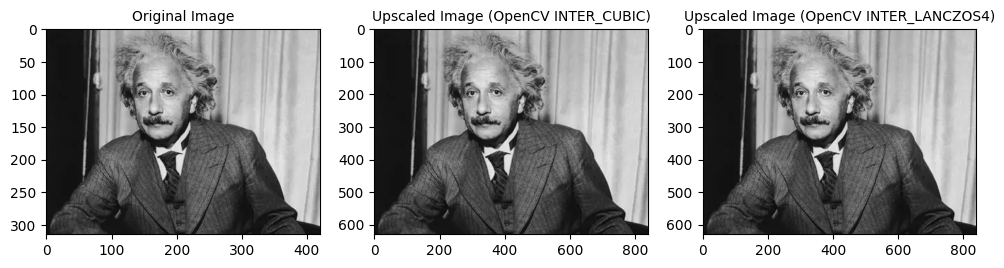

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read RGB image
image = cv2.imread('dat/einstein.png')  # shape: (H, W, 3)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Use OpenCV's resize function with INTER_CUBIC interpolation
# For upscaling, you typically specify the desired output size (width, height)
# In this case, we want to double both dimensions.
output_opencv_cubic = cv2.resize(image, (image.shape[1] * 2, image.shape[0] * 2), interpolation=cv2.INTER_CUBIC)

# You can also try INTER_LANCZOS4 for potentially better quality at higher computational cost
output_opencv_lanczos = cv2.resize(image, (image.shape[1] * 2, image.shape[0] * 2), interpolation=cv2.INTER_LANCZOS4)


# Plotting
plt.figure(figsize=(12, 6)) # Adjusted figure size for better display

plt.subplot(1, 3, 1) # Changed to 1x3 for comparison
plt.imshow(image)
plt.title('Original Image', fontsize=10)

plt.subplot(1, 3, 2)
plt.imshow(output_opencv_cubic)
plt.title('Upscaled Image (OpenCV INTER_CUBIC)', fontsize=10)

# Uncomment the following to also display Lanczos4 for comparison
plt.subplot(1, 3, 3)
plt.imshow(output_opencv_lanczos)
plt.title('Upscaled Image (OpenCV INTER_LANCZOS4)', fontsize=10)

plt.show()

# Save the output image if needed
cv2.imwrite('results/result_upscaled_opencv_cubic.png', cv2.cvtColor(output_opencv_cubic, cv2.COLOR_RGB2BGR))
cv2.imwrite('results/result_upscaled_opencv_lanczos.png', cv2.cvtColor(output_opencv_lanczos, cv2.COLOR_RGB2BGR))

In [ ]:
# zoom in comparison
x1 = 160
x2 = x1 + 100
y1 = 75
y2 = y1 + 100
original = cv2.imread('dat/einstein.png')
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
original = original[y1:y2, x1:x2]
mine = cv2.imread('results/result_upscaled.png')
mine = cv2.cvtColor(mine, cv2.COLOR_BGR2RGB)
mine = mine[y1*2:y2*2, x1*2:x2*2]
opencv_cubic = cv2.imread('results/result_upscaled_opencv_cubic.png')
opencv_cubic = cv2.cvtColor(opencv_cubic, cv2.COLOR_BGR2RGB)
opencv_cubic = opencv_cubic[y1*2:y2*2, x1*2:x2*2]
lanczos = cv2.imread('results/result_upscaled_opencv_lanczos.png')
lanczos = cv2.cvtColor(lanczos, cv2.COLOR_BGR2RGB)
lanczos = lanczos[y1*2:y2*2, x1*2:x2*2]

my_temp = mine.copy()
# apply gaussian blur to my_temp
my_temp = cv2.GaussianBlur(my_temp, (3, 3), 0.75)
blur = cv2.GaussianBlur(mine, (5, 5), 0.75)
# apply blur sharpening
gamma = 1
my_temp = cv2.addWeighted(my_temp, 1 + gamma, blur, - gamma, 0)
# apply bilateral filter to my_temp
my_temp = cv2.bilateralFilter(my_temp, 9, 10, 10)

# show images in 2x2 grid
plt.figure(figsize=(10, 10), dpi=800)
plt.subplot(2, 2, 1)
plt.imshow(original)
plt.axis('off')
plt.title('Original Image', fontsize=10)
plt.subplot(2, 2, 2)
plt.imshow(my_temp)
plt.axis('off')
plt.title('My Upscaled Image', fontsize=10) # My Upscaled Image
plt.subplot(2, 2, 3)
plt.imshow(opencv_cubic)
plt.axis('off')
plt.title('OpenCV INTER_CUBIC', fontsize=10) # OpenCV INTER_CUBIC
plt.subplot(2, 2, 4)
plt.imshow(lanczos)
plt.axis('off')
plt.title('OpenCV INTER_LANCZOS4', fontsize=10) # OpenCV INTER_LANCZOS4
plt.tight_layout()
plt.savefig('results/result_comparison_upscaled.png', dpi=800, bbox_inches='tight')

plt.show()

# Save the plot

$\text{FFT} \rightarrow \text{Pad with zeros} \rightarrow \text{inverse FFT} $
- Observation: the result has wave like artifacts towards the edges. Except for this, the central part is comparable to Lanczos interpolation.

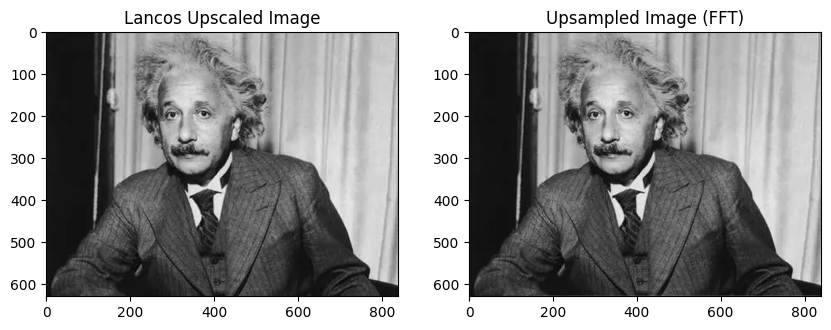

True

In [ ]:
# Compute the FFT of the image.
# Pad the FFT with zeros (e.g., double the size by adding zeros to the high-frequency regions).
# Perform the inverse FFT to obtain the upsampled image.

img = cv2.imread('dat/einstein.png', cv2.IMREAD_GRAYSCALE)
# img = img[75:175, 160:260]  

# Compute the FFT of the image.
f = np.fft.fft2(img)
# Shift the zero-frequency component to the center.
fshift = np.fft.fftshift(f)
# Pad the FFT with zeros (e.g., double the size by adding zeros to the high-frequency regions).
fshift_padded = np.zeros((img.shape[0] * 2, img.shape[1] * 2), dtype=np.complex128)
fshift_padded[:img.shape[0], :img.shape[1]] = fshift
# Perform the inverse FFT to obtain the upsampled image.
img_upsampled = np.fft.ifft2(np.fft.ifftshift(fshift_padded))
# Multiply by scale factor (area increase)
scale_factor = (img_upsampled.shape[0] * img_upsampled.shape[1]) / (img.shape[0] * img.shape[1])
img_upsampled = np.abs(img_upsampled) * scale_factor
# Normalize and convert to uint8
img_upsampled = np.clip(img_upsampled, 0, 255).astype(np.uint8)


lanc = cv2.resize(img, (img.shape[1] * 2, img.shape[0] * 2), interpolation=cv2.INTER_LANCZOS4)

# Plotting the original and upsampled images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(lanc, cmap='gray')
plt.title('Lancos Upscaled Image')
# plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_upsampled, cmap='gray')
plt.title('Upsampled Image (FFT)')
# plt.axis('off')
plt.show()

cv2.imwrite('results/result_upscaled_fft.png', img_upsampled)

### Downsampling
- Downsampling naively by choosing every $k$-th sample $\rightarrow$ Not a good idea, as it introduces aliasing artifacts.
- Instead, we first do gaussian blur then downsample.

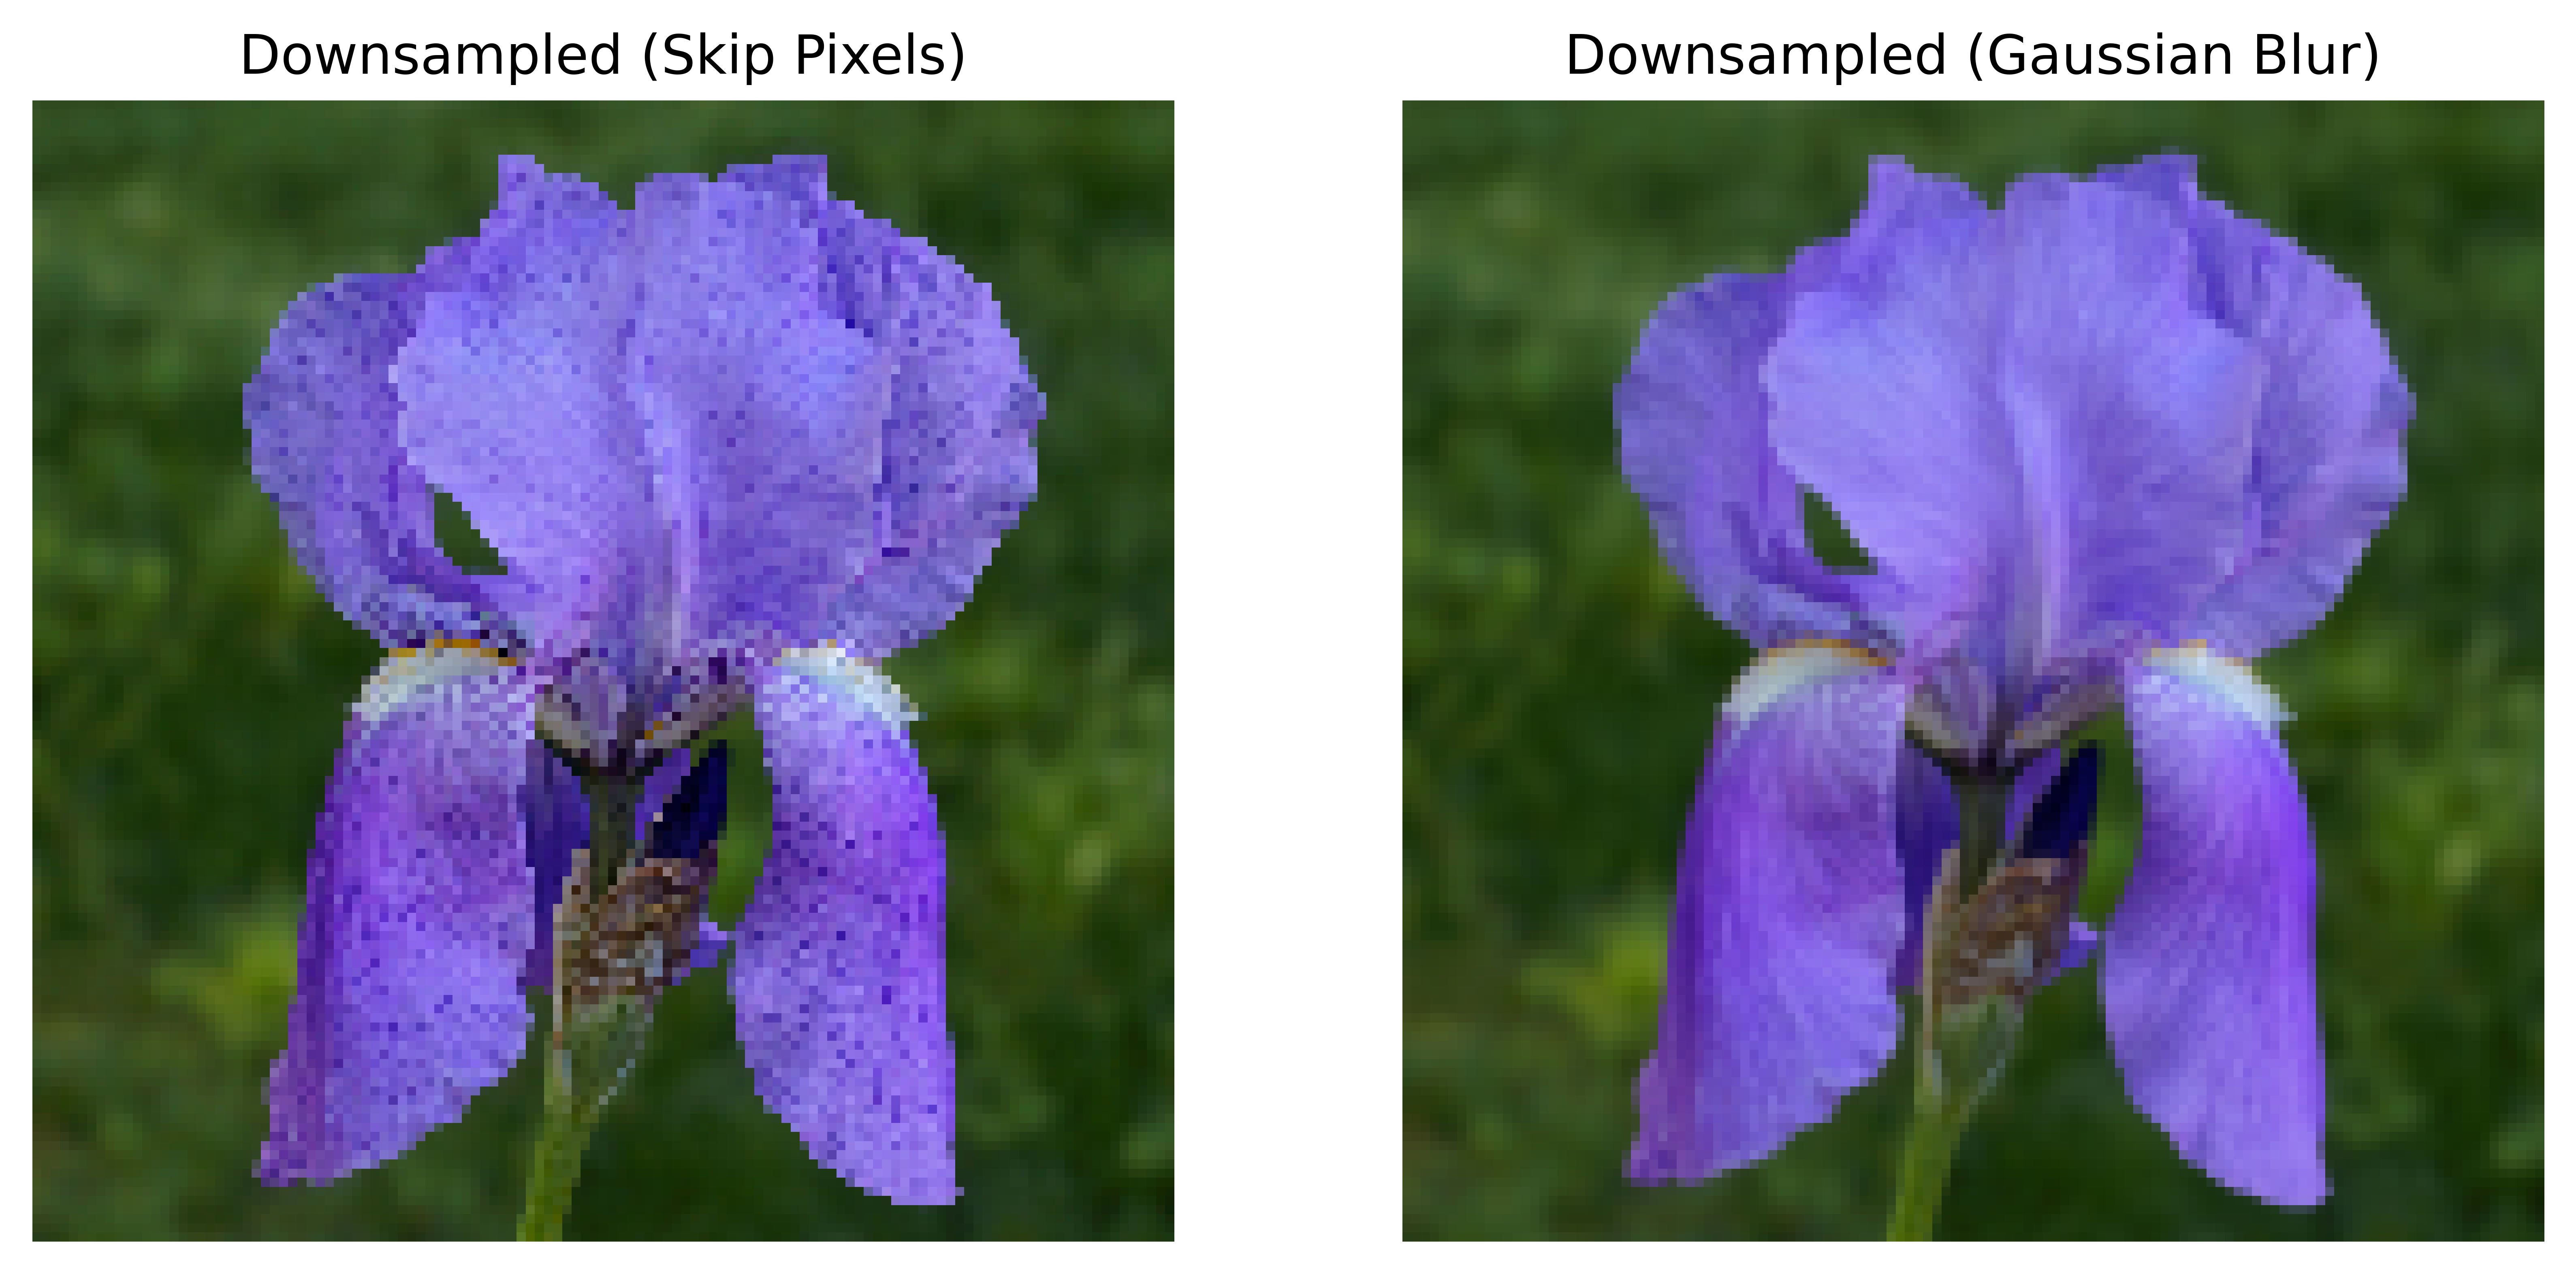

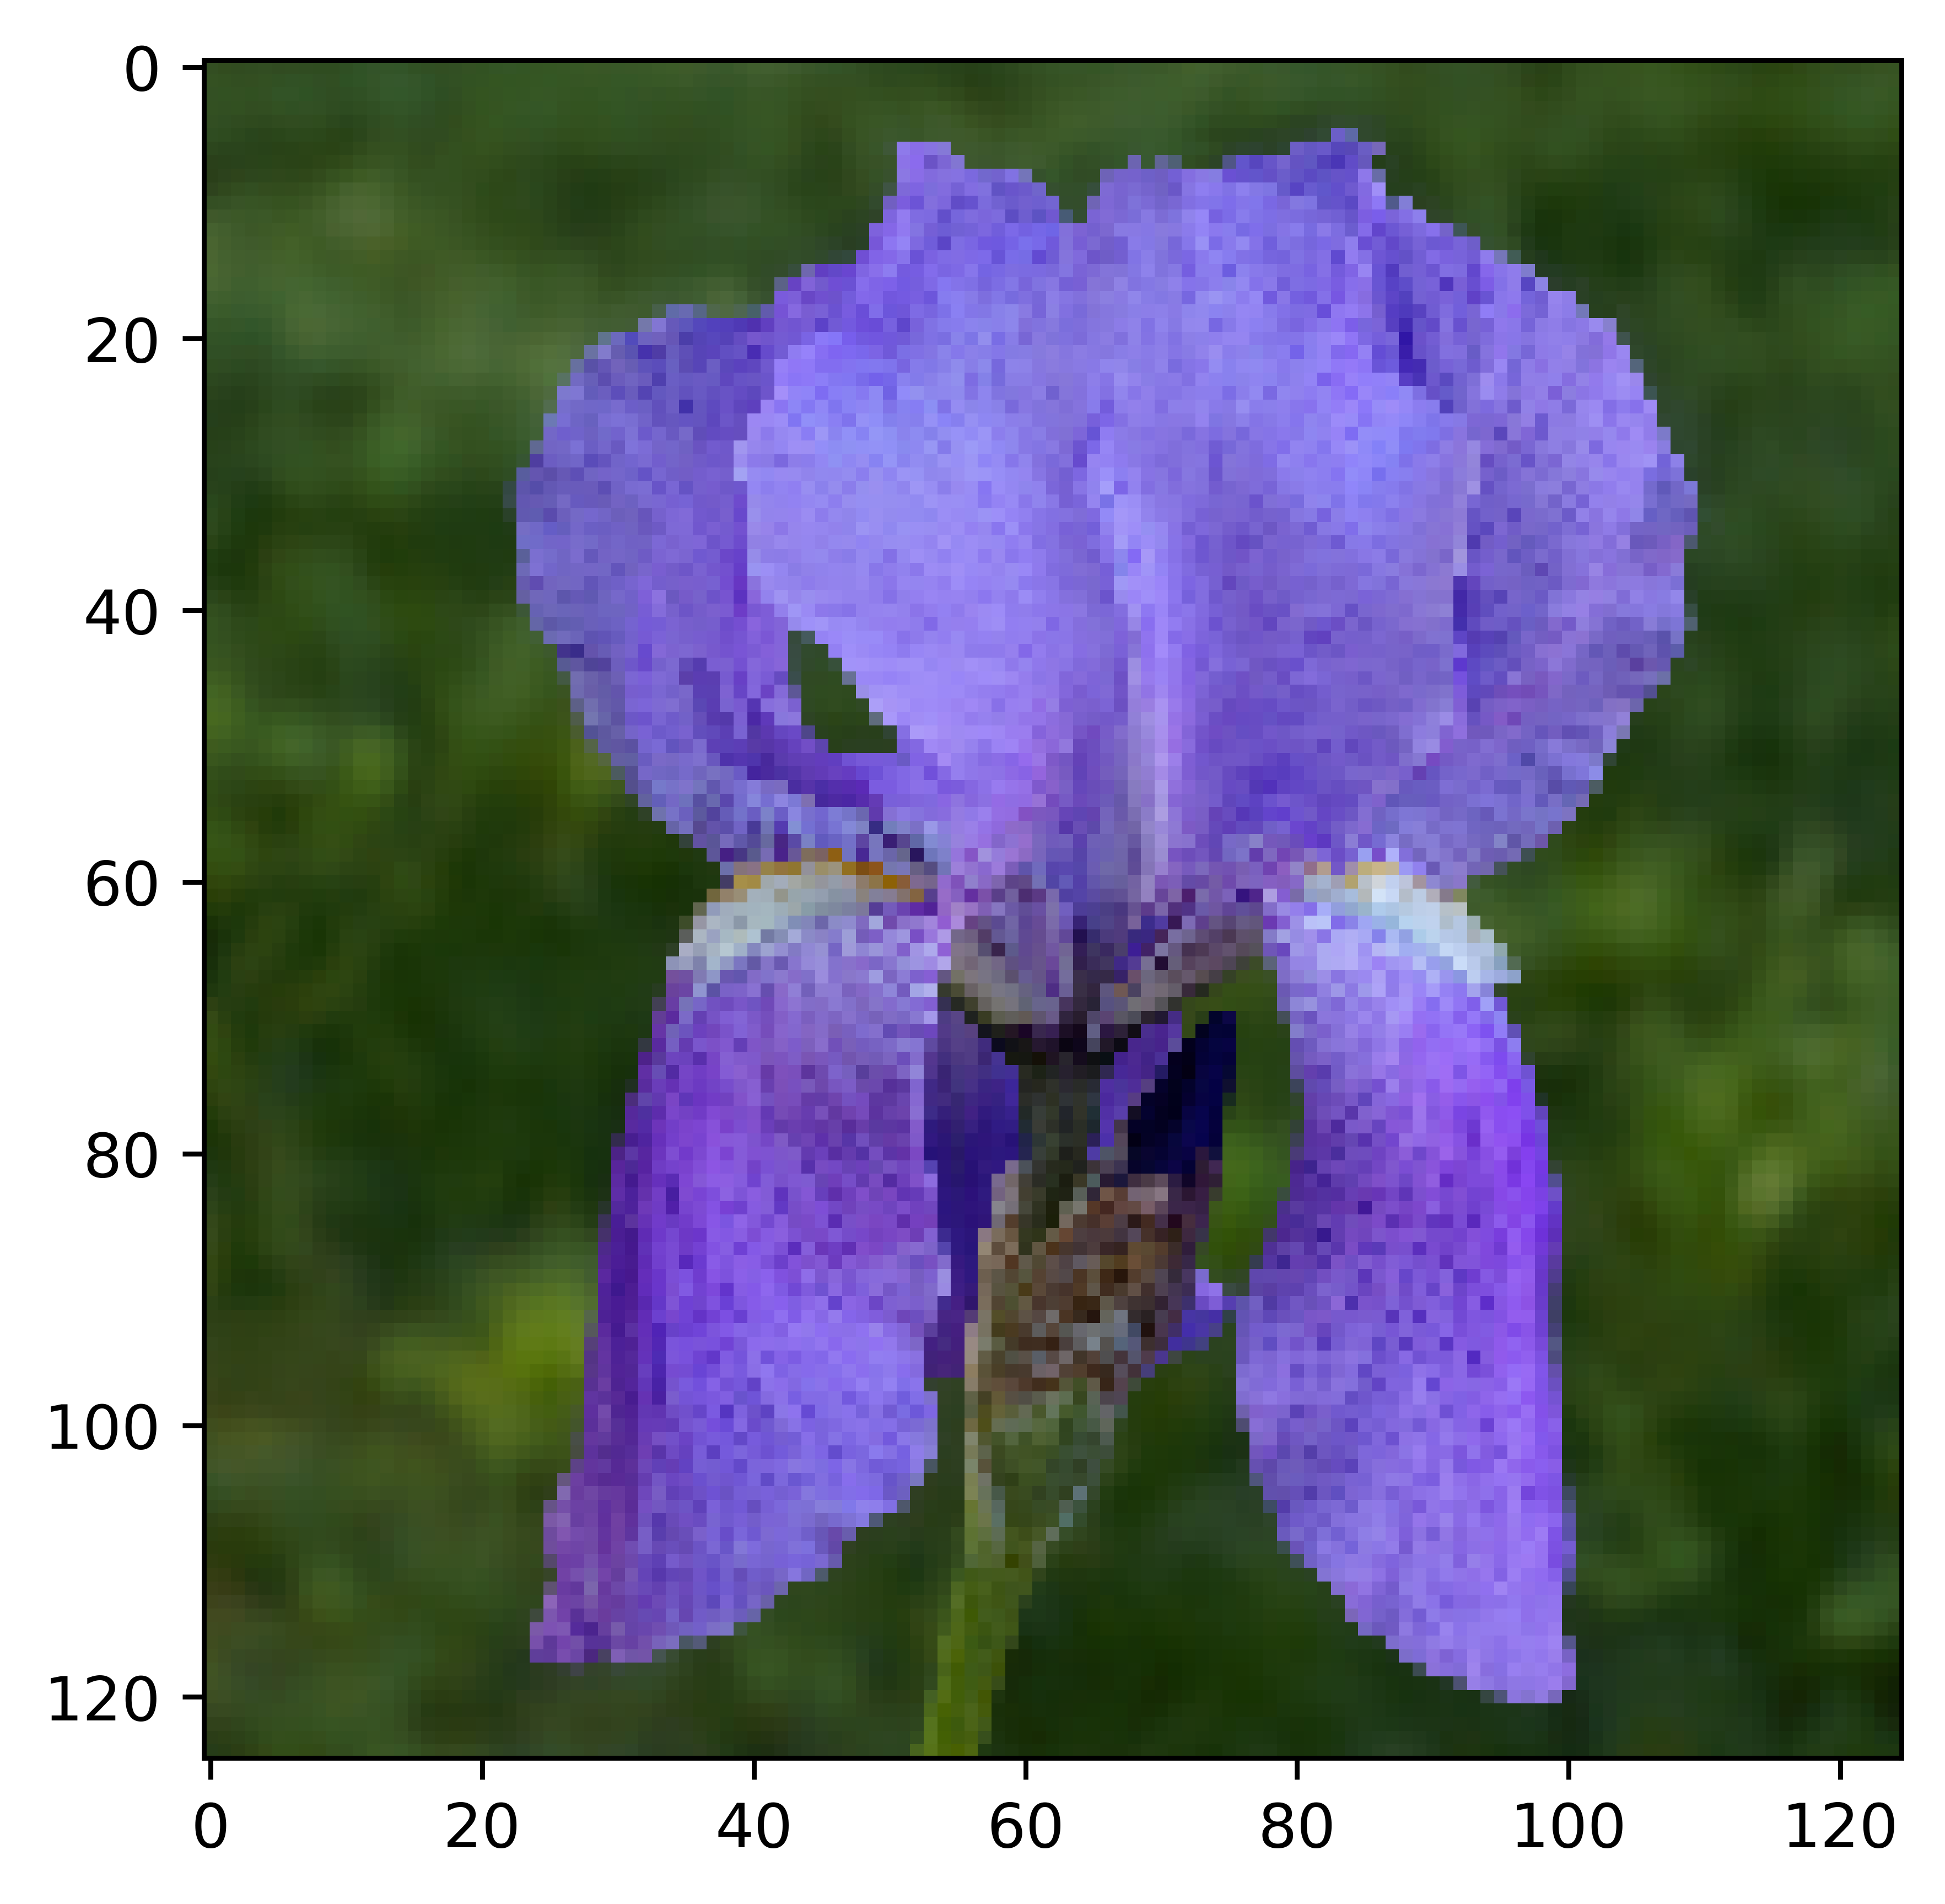

In [ ]:
img = cv2.imread('dat/Iris.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# we downsample the image by 2x by selecting every 2nd pixel in both dimensions
downsampled_skip = img[::8, ::8]
downsampled_blur = cv2.GaussianBlur(img, (11,11), 3)
downsampled_blur = downsampled_blur[::8, ::8]

plt.figure(figsize=(10, 5), dpi=800)
plt.subplot(1, 2, 1)
plt.imshow(downsampled_skip)
plt.axis('off')
plt.title('Downsampled (Skip Pixels)')
plt.subplot(1, 2, 2)
plt.imshow(downsampled_blur)
plt.axis('off')
plt.title('Downsampled (Gaussian Blur)')
plt.show()

# use cv2.resize to downsample the image
# downsampled_cv2 = cv2.resize(img, (img.shape[1] // 8, img.shape[0] // 8), interpolation=cv2.INTER_AREA)
# plt.figure(figsize=(5, 5), dpi=800)
# plt.imshow(downsampled_cv2)